#### Let's import the required libraries for the case study    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("train.csv")
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

###  Data Understanding, Preparation, and Pre-Processing 

In [3]:
# We have around 172 columns. Let's see their datatypes to know if any are categorical in nature
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

##### We see that total 9 columns are of object datatype. Let's see the values for these columns and figure out if they would mean any business value.

In [4]:
object_cols = list(data.select_dtypes(include=["object"]).columns)
object_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

###### We see that these columns are of date datatype and they simply describe the last date of the month. 
###### From a business point of view, last date of the month will not have any impact on the customer's behaviour as it's a static data. Hence we can exclude this column from further analysis

In [5]:
type(object_cols)

list

In [6]:
data = data.drop(columns=object_cols)
# Let's see if there are any columns left with object data type
data.select_dtypes(include=["object"])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

##### As we can see from above, no column is left with object data type. Once we have all the data in numeric data type let's move on to checking if there are any null values present in the dataset

In [7]:
data.info(verbose=True, show_counts=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 163 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    id                  69999 non-null  int64  
 1    circle_id           69999 non-null  int64  
 2    loc_og_t2o_mou      69297 non-null  float64
 3    std_og_t2o_mou      69297 non-null  float64
 4    loc_ic_t2o_mou      69297 non-null  float64
 5    arpu_6              69999 non-null  float64
 6    arpu_7              69999 non-null  float64
 7    arpu_8              69999 non-null  float64
 8    onnet_mou_6         67231 non-null  float64
 9    onnet_mou_7         67312 non-null  float64
 10   onnet_mou_8         66296 non-null  float64
 11   offnet_mou_6        67231 non-null  float64
 12   offnet_mou_7        67312 non-null  float64
 13   offnet_mou_8        66296 non-null  float64
 14   roam_ic_mou_6       67231 non-null  float64
 15   roam_ic_mou_7       67312 non-null

In [8]:
missing_data_percent = 100*data.isnull().sum()/len(data)
missing_data_percent

id                     0.000000
circle_id              0.000000
loc_og_t2o_mou         1.002871
std_og_t2o_mou         1.002871
loc_ic_t2o_mou         1.002871
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t

In [9]:
missing_data_percent.value_counts()

0.000000     46
3.954342     29
3.838626     29
5.290076     29
74.902499     9
74.478207     9
73.689624     9
1.002871      3
Name: count, dtype: int64

In [10]:
# We see that there are columns having around 74% missing values, we should be removing these columns as they
# would not be helpful in model building and making prediction
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=136)

In [11]:
data = data[new_vars]

In [12]:
# Let us remove columns id and circle_id as well as they are simply unique identifiers representing the row
data = data.drop(columns=["id","circle_id"])
data.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0   31.277   87.009    7.527   
1             0.0             0.0             0.0    0.000  122.787   42.953   
2             0.0             0.0             0.0   60.806  103.176    0.000   
3             0.0             0.0             0.0  156.362  205.260  111.095   
4             0.0             0.0             0.0  240.708  128.191  101.565   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        48.58       124.38         1.29         32.24         96.68   
1         0.00         0.00         0.00          0.00         25.99   
2         0.53        15.93         0.00         53.99         82.05   
3         7.26        16.01         0.00         68.76         78.48   
4        21.28         4.83         6.13         56.99         38.11   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          2.33           0.00            0.0            0.0           0.00   
1         30.89           0.00            0.0            0.0           0.00   
2          0.00           0.00            0.0            0.0           0.00   
3         50.23           0.00            0.0            0.0           0.00   
4          9.63          53.64            0.0            0.0          15.73   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0           0.00              2.23              0.00   
1            0.0           0.00              0.00              0.00   
2            0.0           0.00              0.53             12.98   
3            0.0           1.63              6.99              3.94   
4            0.0           0.00             10.16              4.83   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.28              5.29             16.04              2.33   
1              0.00              0.00              0.00              0.00   
2              0.00             24.11              0.00              0.00   
3              0.00             37.91             44.89             23.63   
4              6.13             36.74             19.88              4.61   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              2.14   
3              0.00              0.00              0.00              0.00   
4             11.99              1.23              5.01              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          7.53         16.04   
1             22.01             29.79          0.00          0.00   
2              0.00              0.00         24.64         12.98   
3              0.00              8.03         44.91         48.84   
4              9.85              0.00         58.91         25.94   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          2.61             46.34            124.38              1.01   
1          0.00              0.00              0.00              0.00   
2          0.00              0.00              2.94              0.00   
3         23.63              0.26             12.06              0.00   
4         15.76              0.00              0.00              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0             18.75             80.61               0.0              0.00   
1              0.00              0.00               0.0              0.00   
2             28.94             82.05               0.0              0.00   
3             15.33             25.93               4.6              0.56   
4              4.35   

In [13]:
# We have around 136 columns now, let's see if any of them are having higher percentage of missing values
(100*data.isnull().sum()/len(data)).describe()

count    134.000000
mean       2.853857
std        2.131046
min        0.000000
25%        0.000000
50%        3.838626
75%        3.954342
max        5.290076
dtype: float64

In [14]:
# We see that the missing percentage is very low that is 5 Percent. Lets try imputing zero value for these missing records
data = data.fillna(0)

In [15]:
(100*data.isnull().sum()/len(data)).describe()

count    134.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

### Exploratory Data Analysis

##### Let's check for outliers

In [16]:
def show_box_plot_in_batches(dataarray):
    prev=0
    for i in range(15,len(dataarray.columns),16):
        plt.figure(figsize=(15,8))
        plt.xticks(rotation=45)
        sns.boxplot(data = dataarray.iloc[:,prev:i])
        prev = i

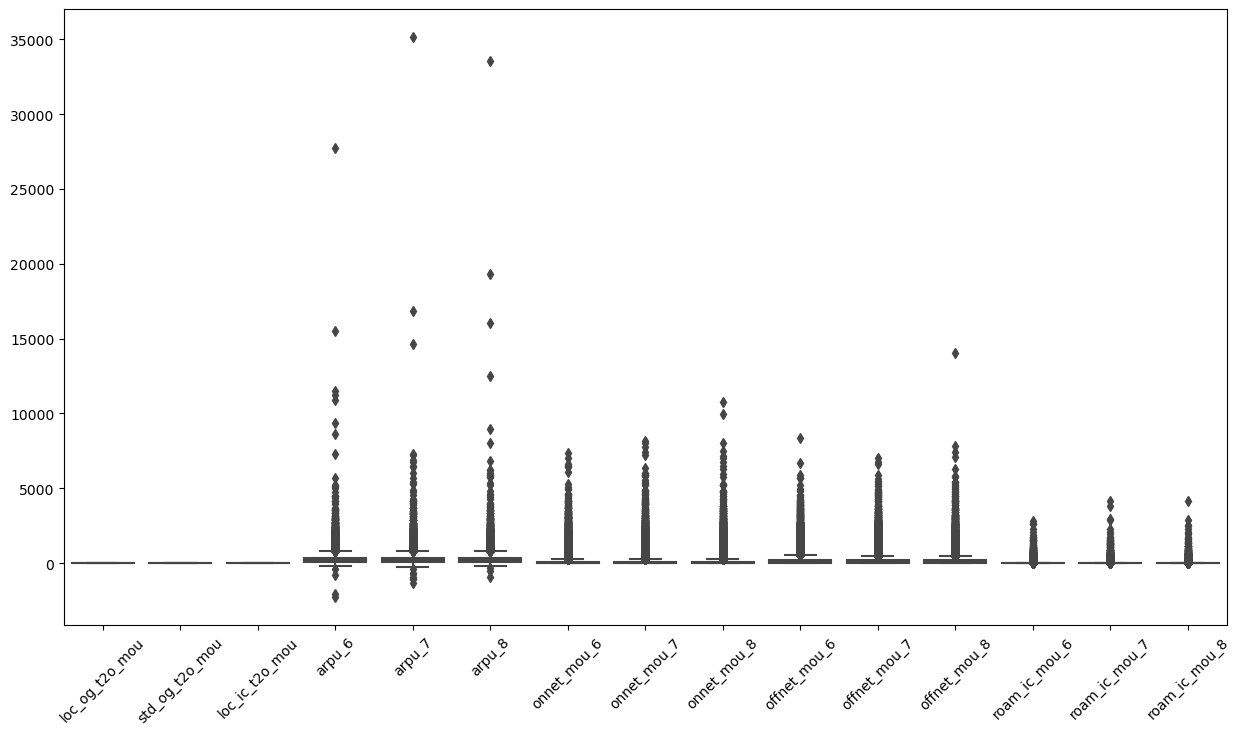

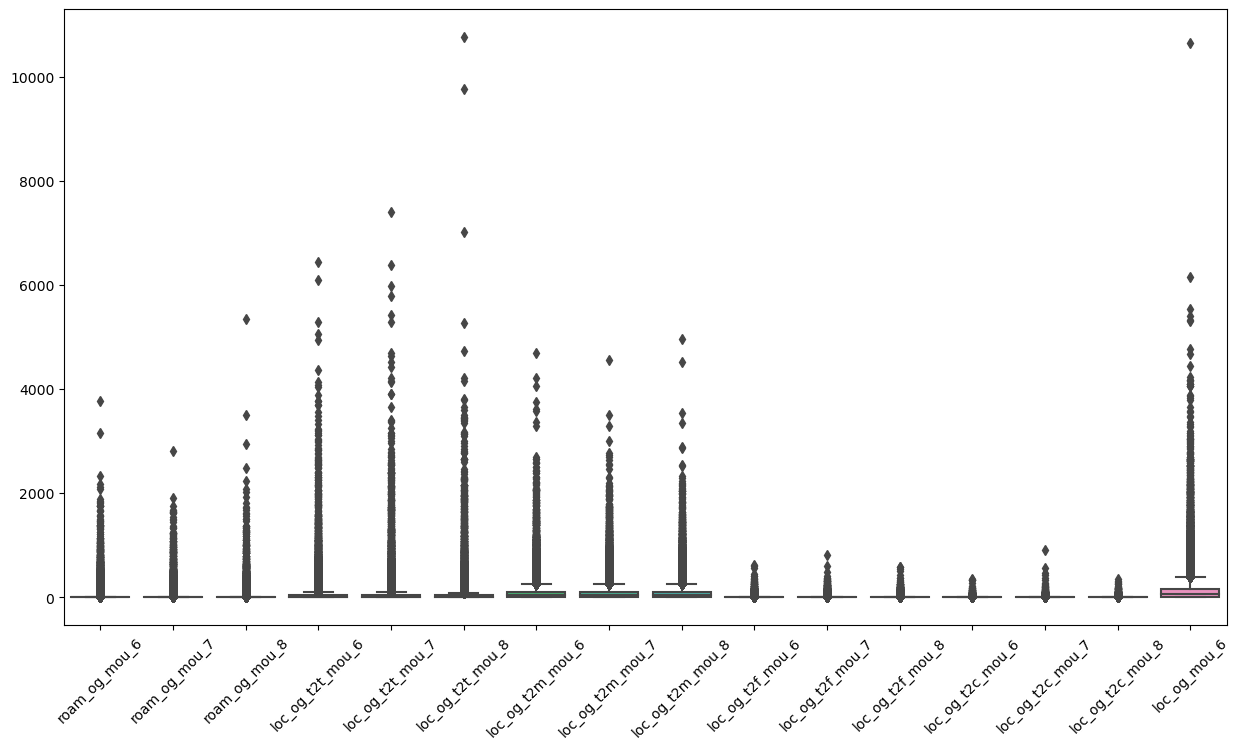

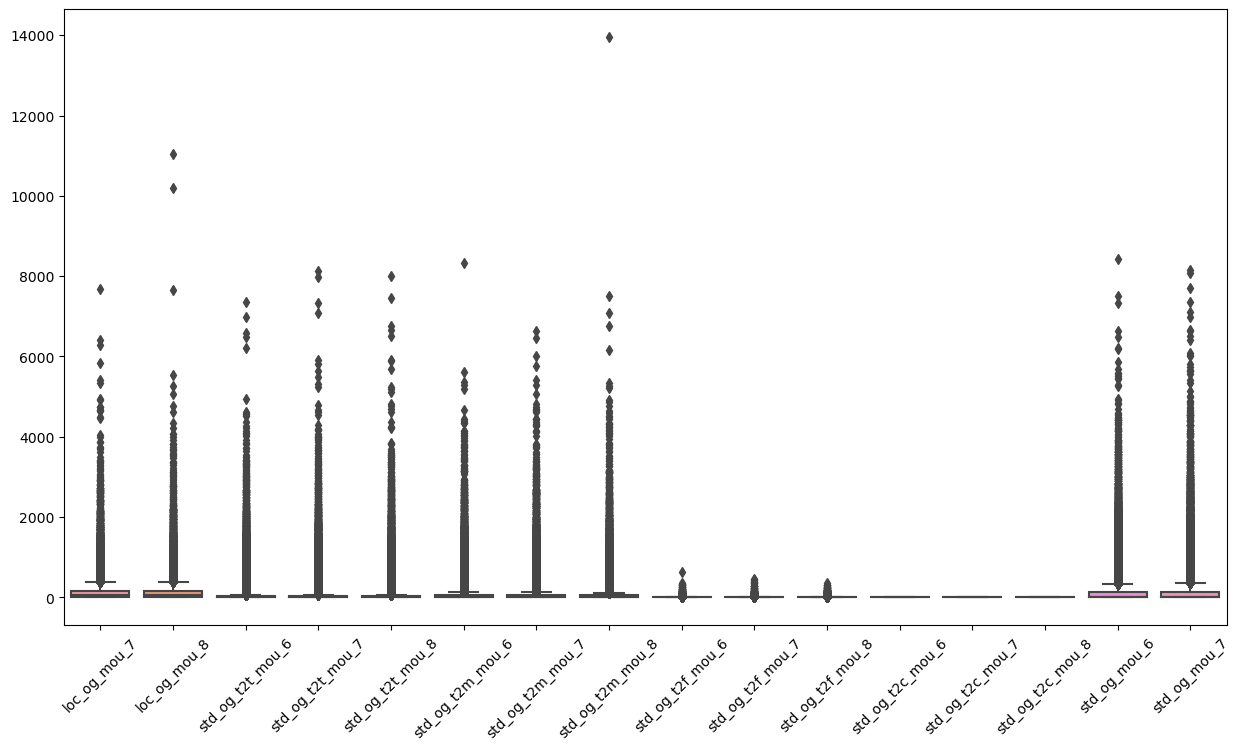

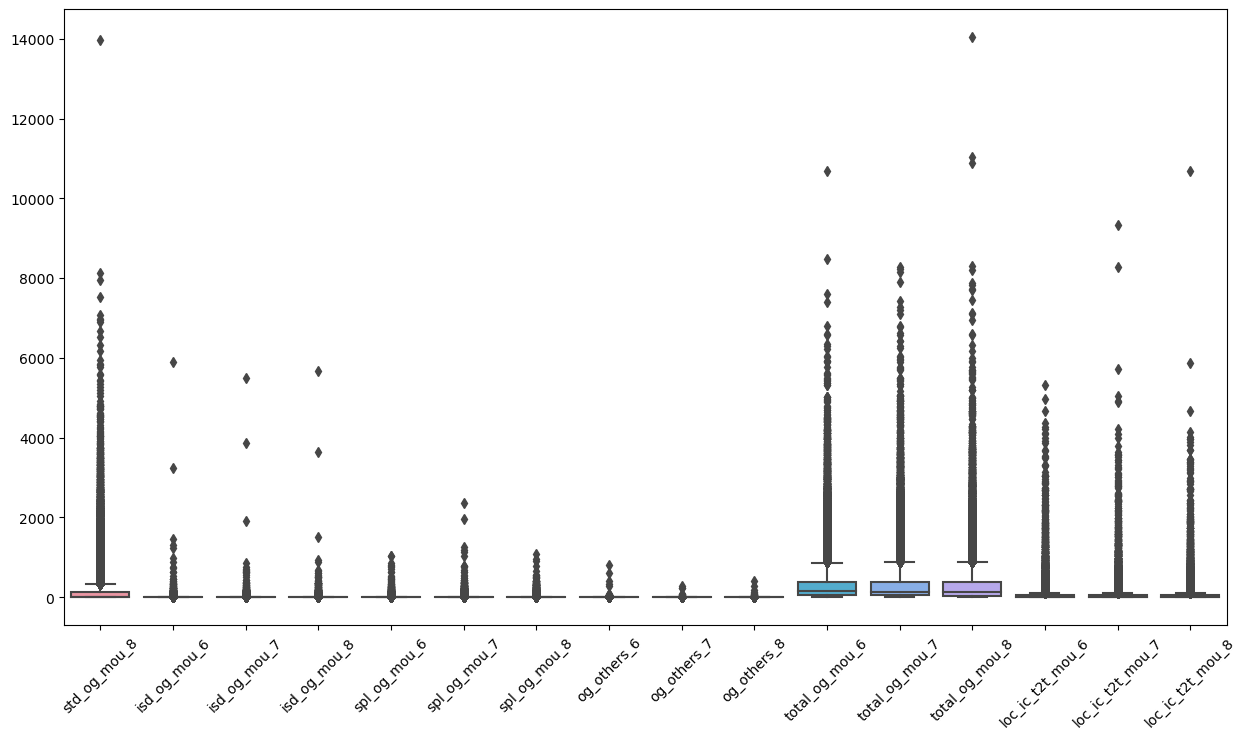

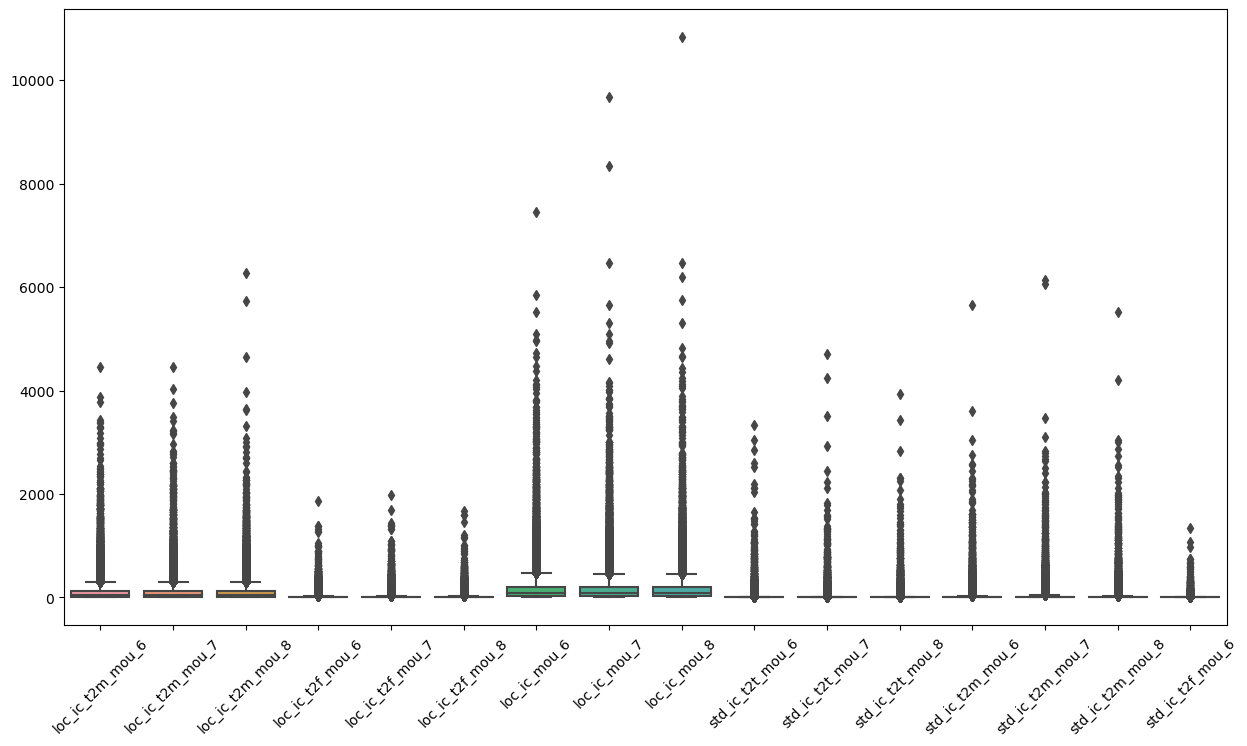

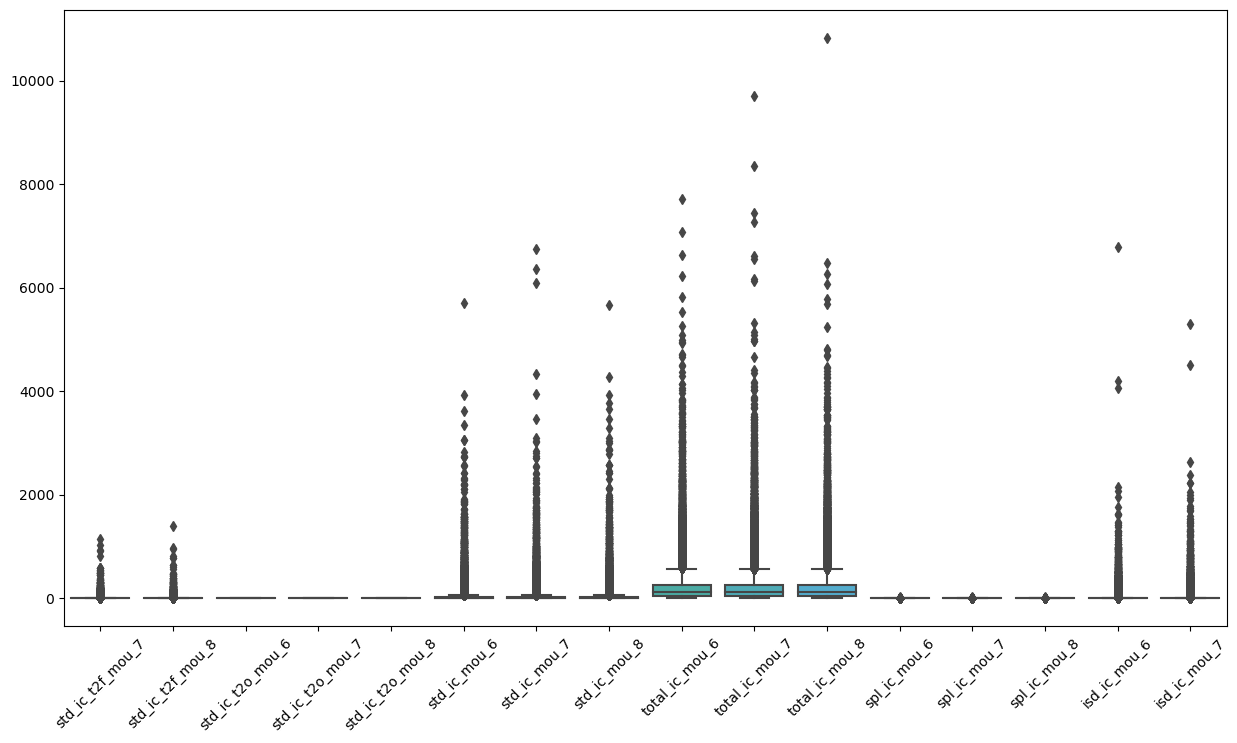

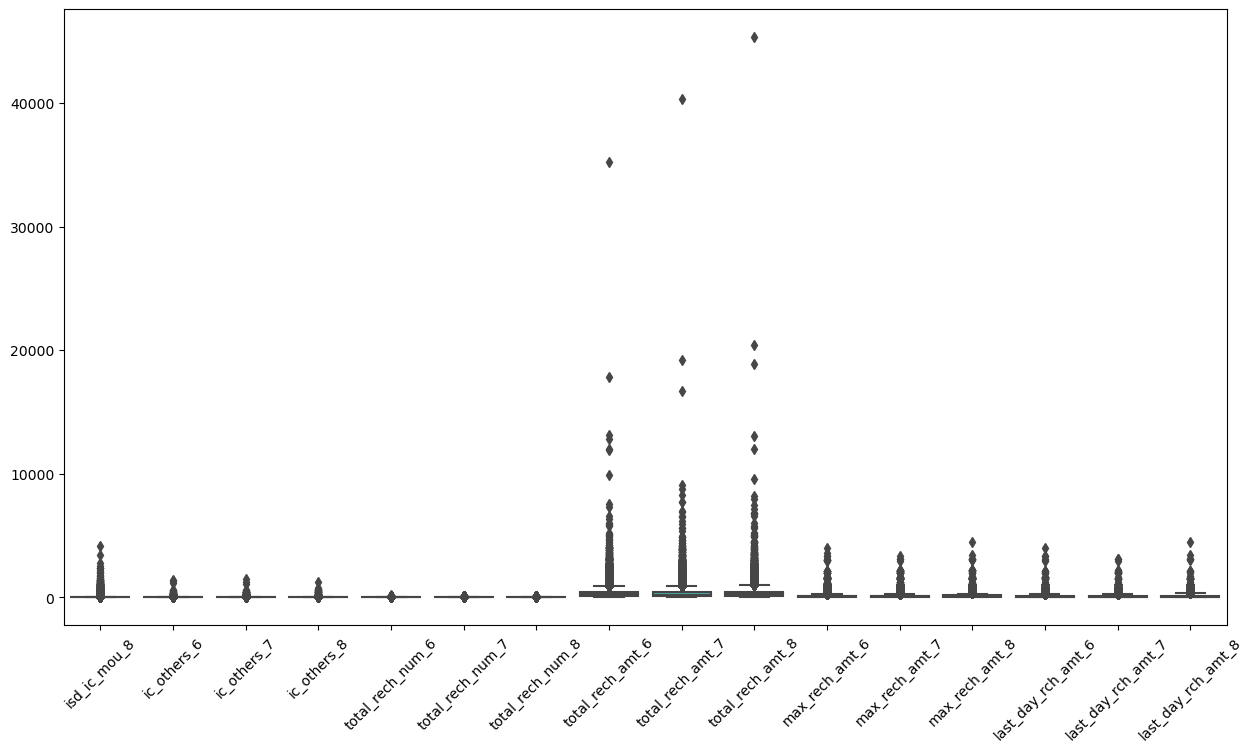

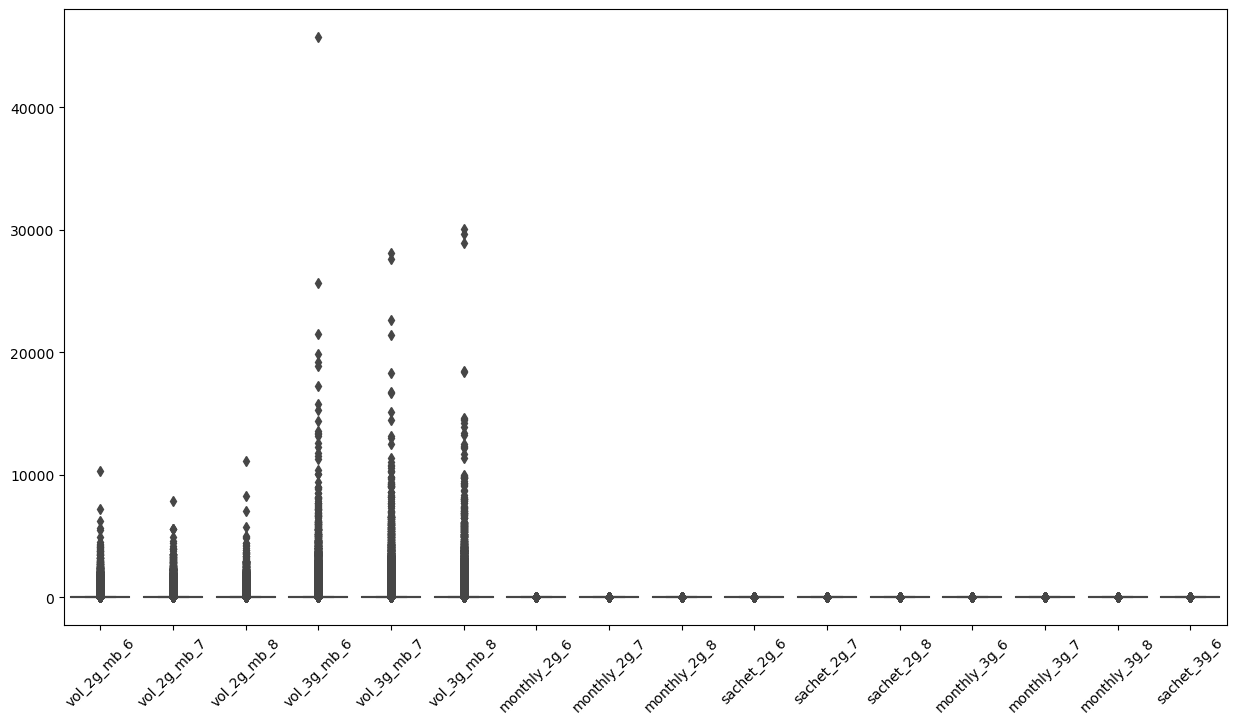

In [17]:
# Visualizing with the help of bar plot
# Since there are around 136 columns, viewing bar plot for all of the columns on X axis will not be possible.
# Let's divide the columns into 15 batches and run the box plot on them

show_box_plot_in_batches(data)

In [18]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99], include="all")

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         69999.0         69999.0         69999.0  69999.000000   
mean              0.0             0.0             0.0    283.134365   
std               0.0             0.0             0.0    334.213918   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0     93.581000   
50%               0.0             0.0             0.0    197.484000   
75%               0.0             0.0             0.0    370.791000   
90%               0.0             0.0             0.0    619.993800   
95%               0.0             0.0             0.0    832.022700   
99%               0.0             0.0             0.0   1400.276640   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     278.185912    278.858826    127.887939    128.754731    125.943607   
std      344.366927    351.924315    295.115497    306.326345    304.990552   
min    -1289.715000   -945.808000      0.000000      0.000000      0.000000   
25%       86.714000     84.095000      5.430000      4.910000      4.110000   
50%      191.588000    192.234000     30.830000     29.160000     27.840000   
75%      365.369500    369.909000    113.100000    108.940000    106.280000   
90%      615.661400    614.994600    331.766000    334.886000    326.298000   
95%      823.236700    828.464700    598.600000    608.878000    596.125000   
99%     1414.891380   1445.054800   1429.040400   1461.342200   1448.891000   
max    35145.834000  33543.624000   7376.710000   8157.780000  10752.560000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  69999.000000  69999.000000  69999.000000   69999.000000   69999.000000   
mean     191.010582    189.585401    186.146273       9.379276       6.745305   
std      312.900706    318.492632    318.453812      56.260778      54.892940   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       28.790000     26.690000     23.780000       0.000000       0.000000   
50%       89.810000     85.590000     83.010000       0.000000       0.000000   
75%      223.540000    218.350000    216.410000       0.000000       0.000000   
90%      468.898000    470.054000    467.636000      10.890000       4.392000   
95%      719.500000    731.602000    715.915000      38.842000      21.562000   
99%     1520.310000   1517.838600   1492.232400     213.827400     149.030200   
max     8362.360000   7043.980000  14007.340000    2850.980000    4155.830000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.634328      13.625476       9.464386       9.254848   
std        51.999899      72.055036      57.409013      62.923987   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%         4.280000      20.864000       8.560000       7.552000   
95%        21.992000      65.931000      40.185000      38.842000   
99%       150.231600     284.721400     216.591800     206.347000   
max      4169.810000    3775.110000    2812.040000    5337.040000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          45.050076         44.394344         43.269280         89.551272   
std          148.238746        151.998993        149.944829        159.846546   
min            0.000000          0.000000          0.000000          0.000000  

In [19]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [20]:
data_new = data.apply(cap_outliers, axis=0)

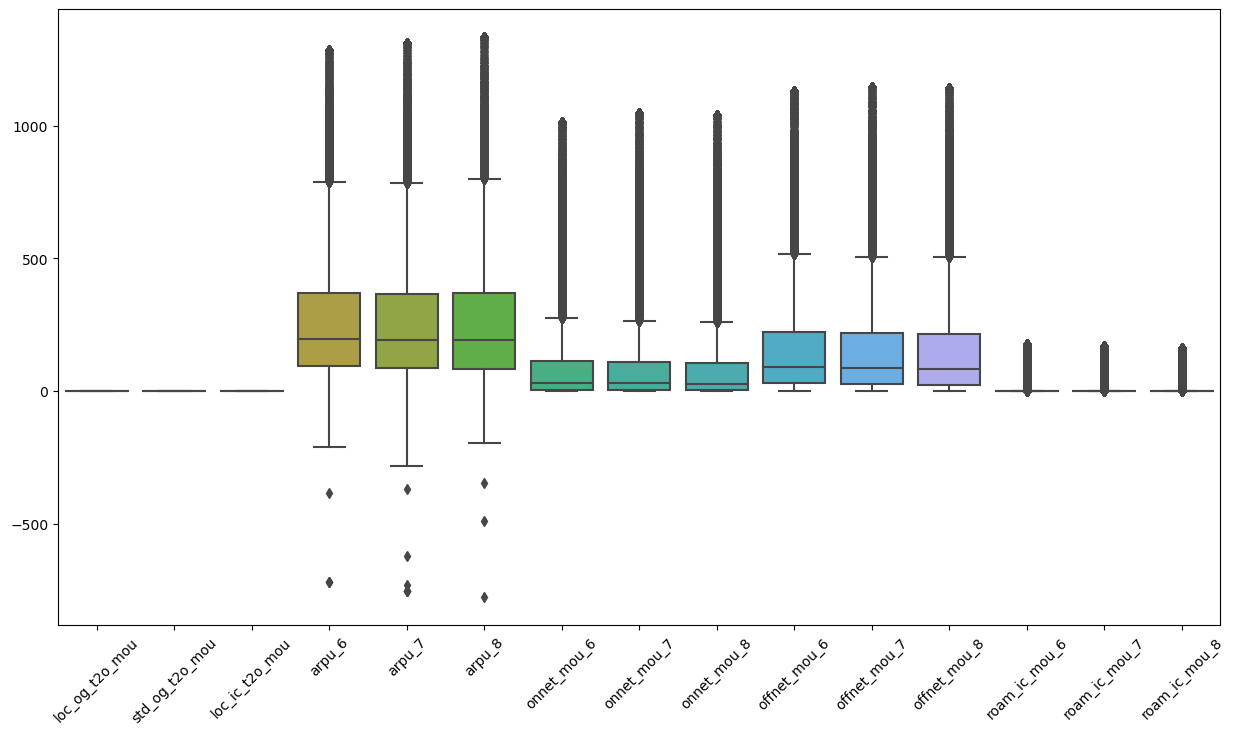

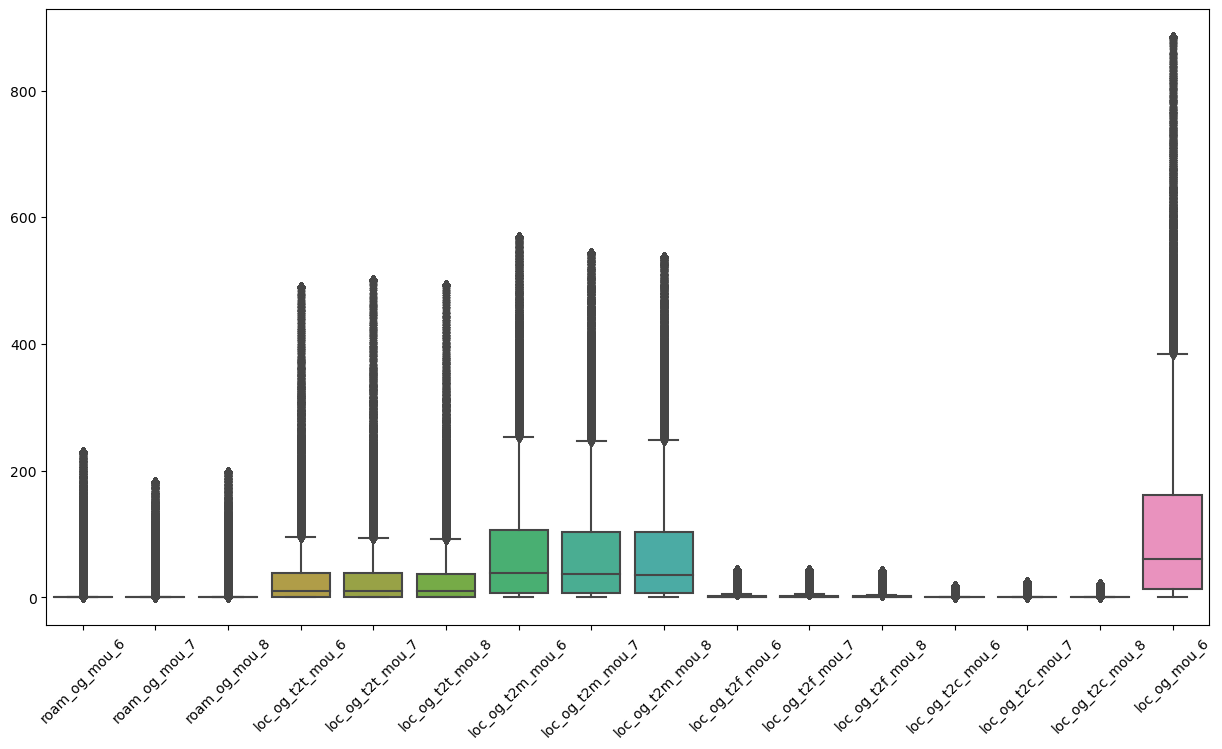

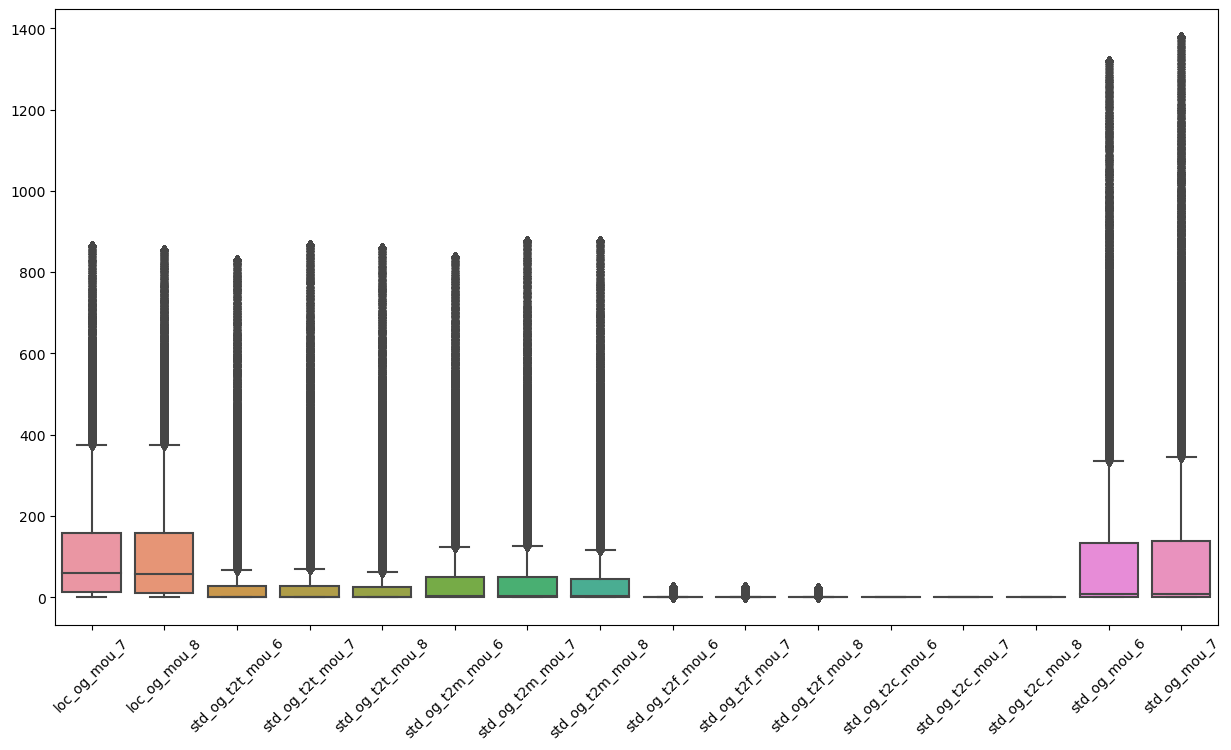

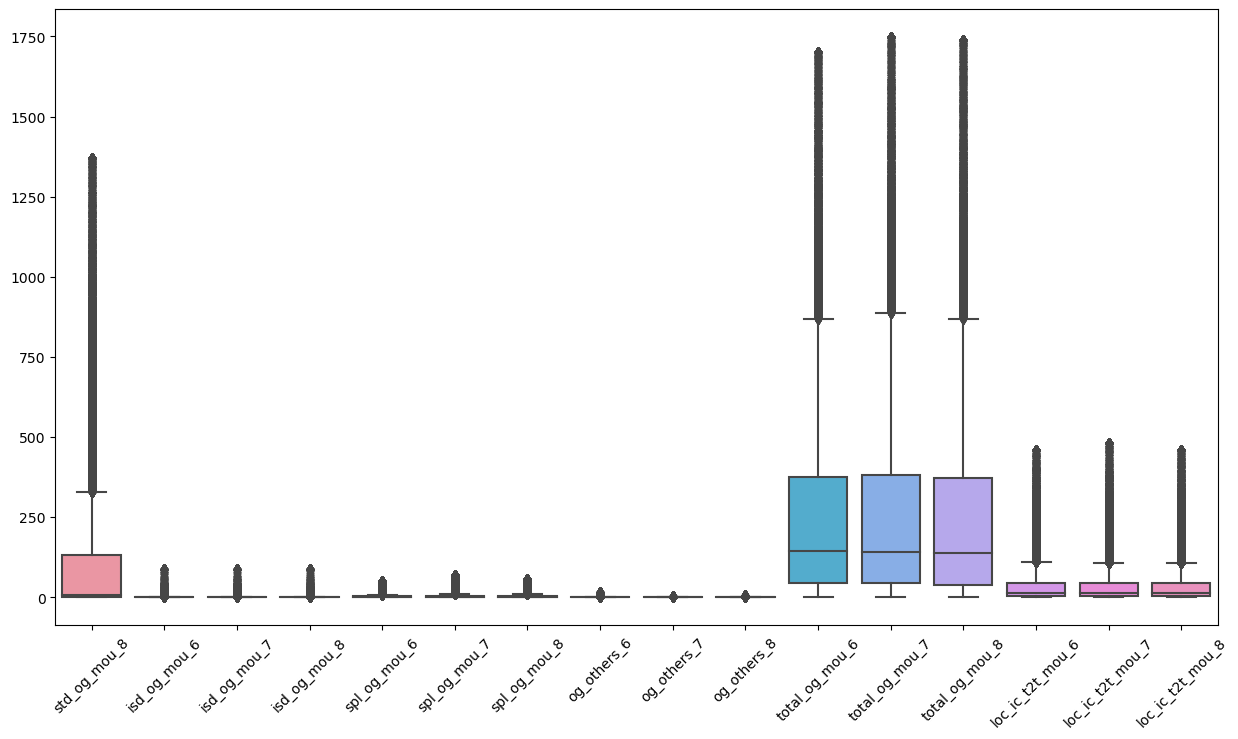

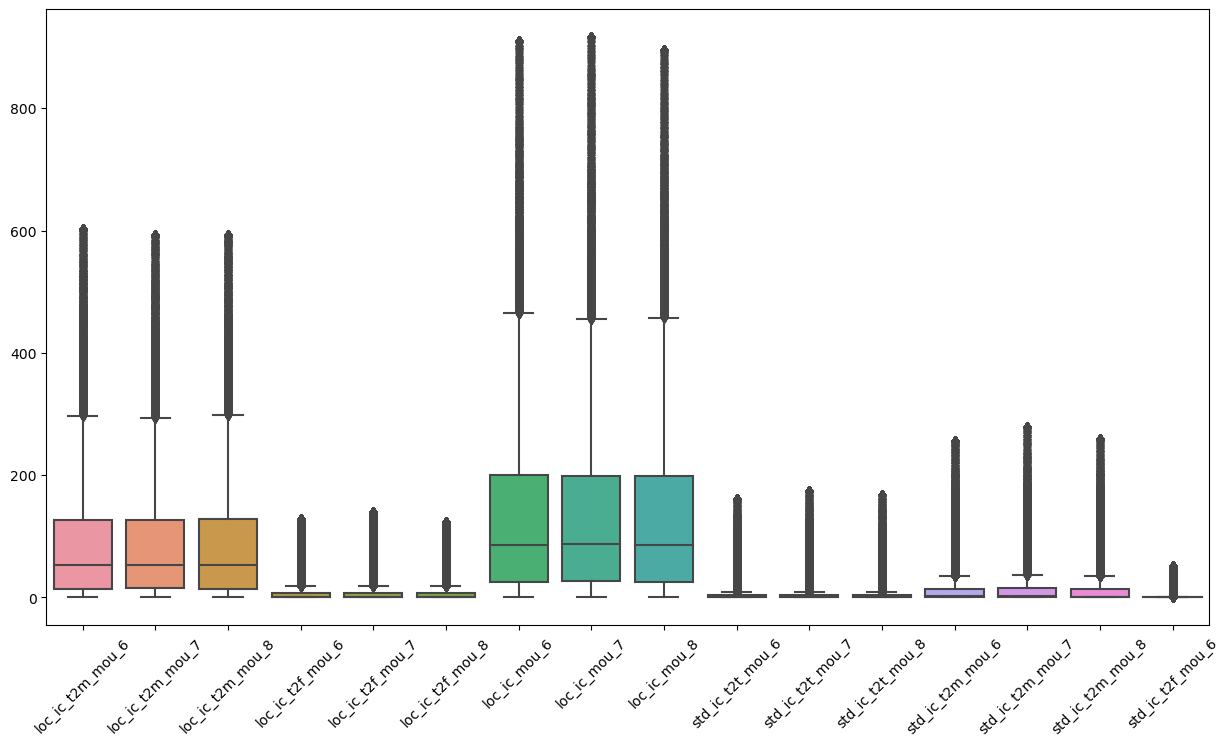

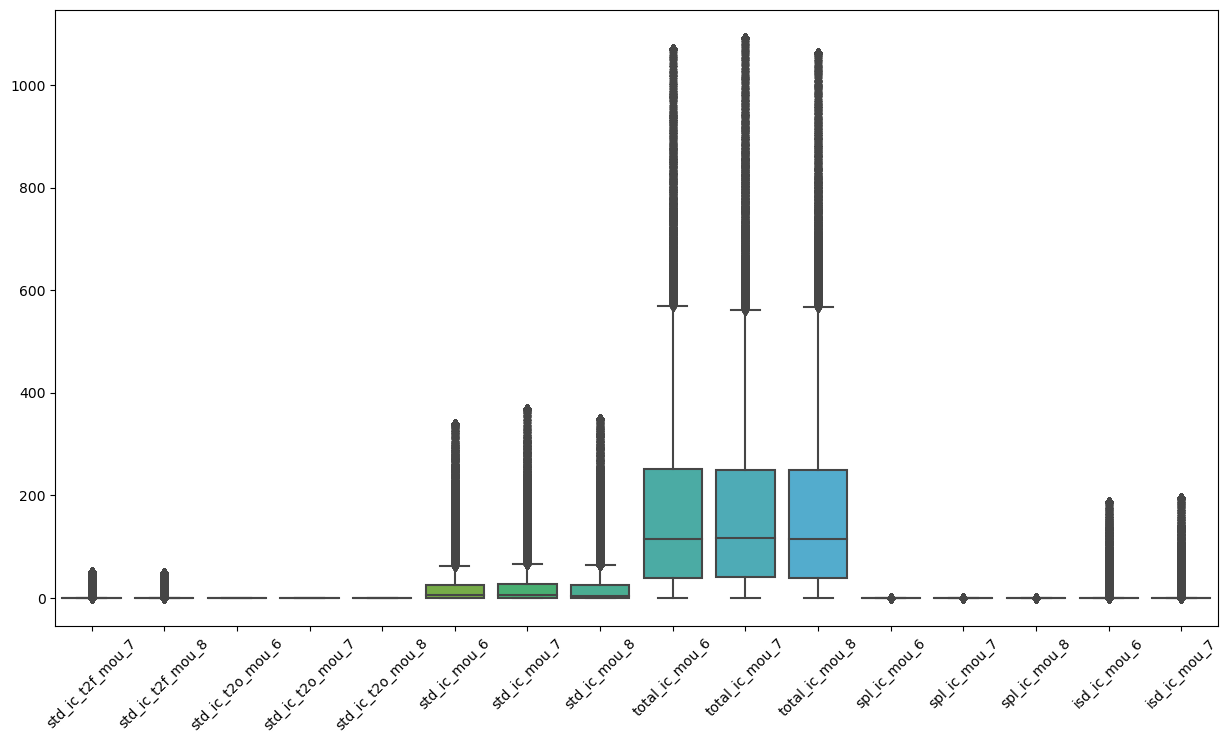

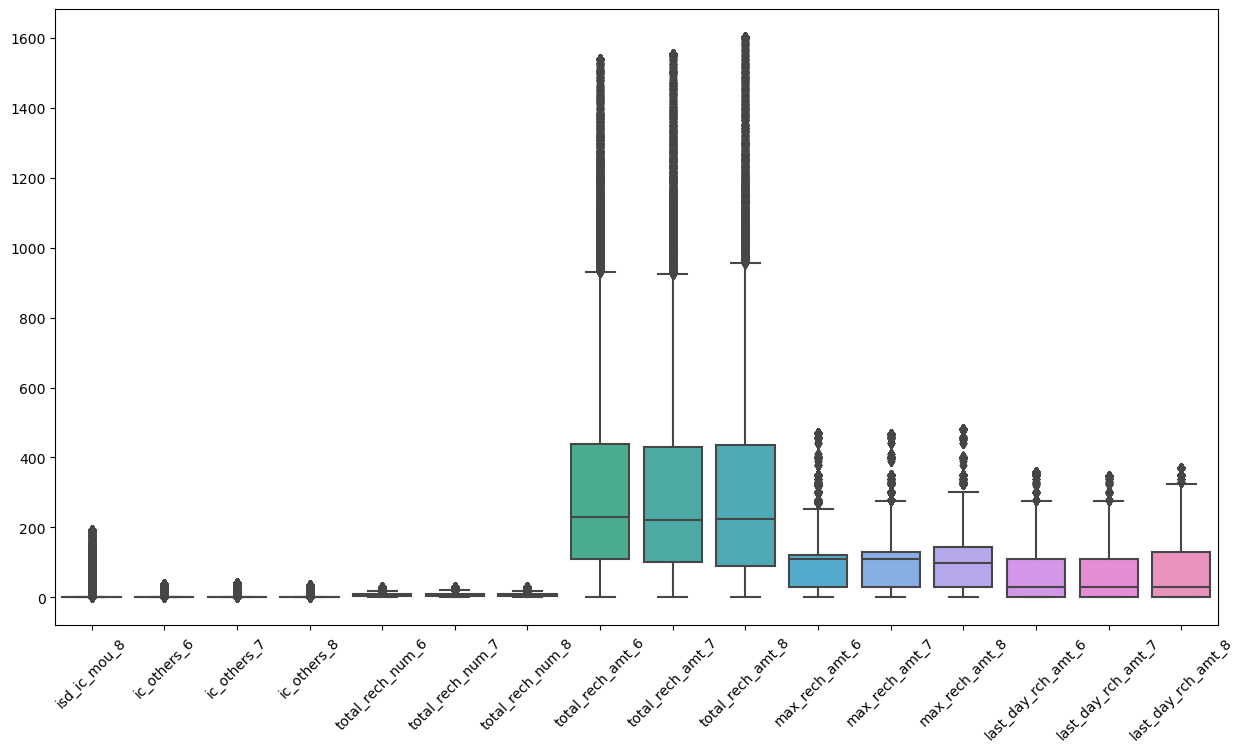

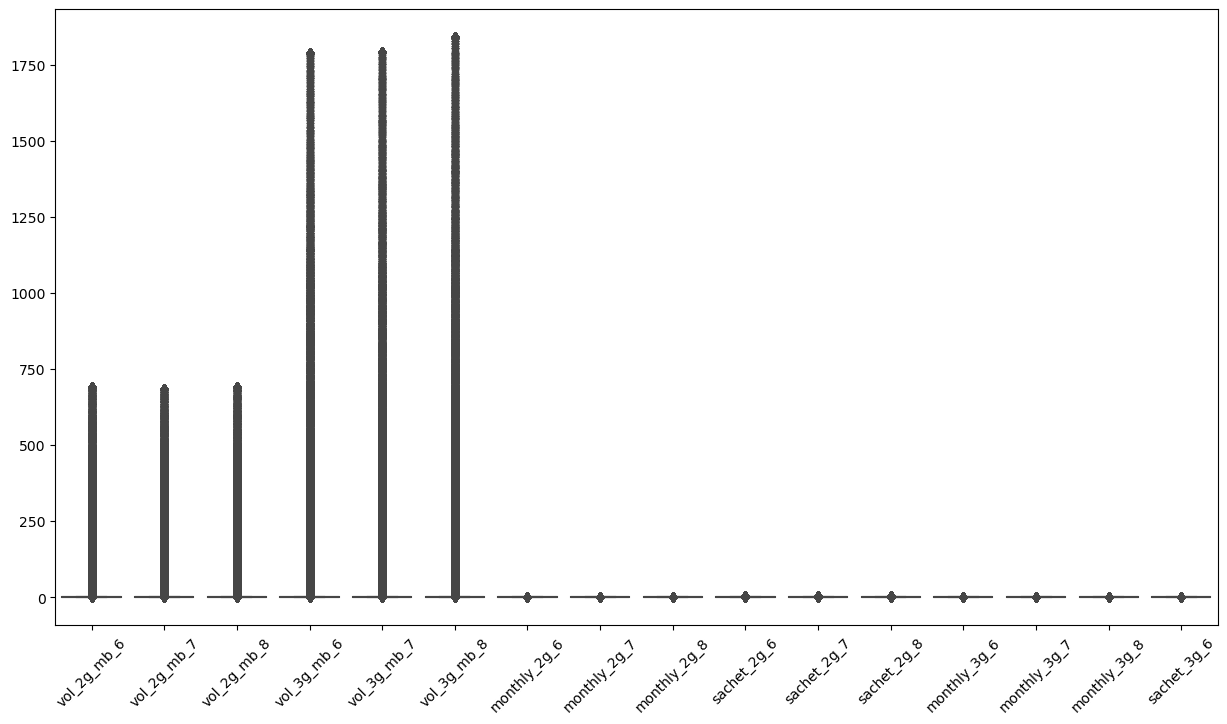

In [21]:
show_box_plot_in_batches(data_new)

In [22]:
# Getting X and y dataframe and splitting into train and test dataset
y = data_new.pop("churn_probability")
X = data_new

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 133), (21000, 133), (48999,), (21000,))

##### Let's print correlations for each feature using heatmap

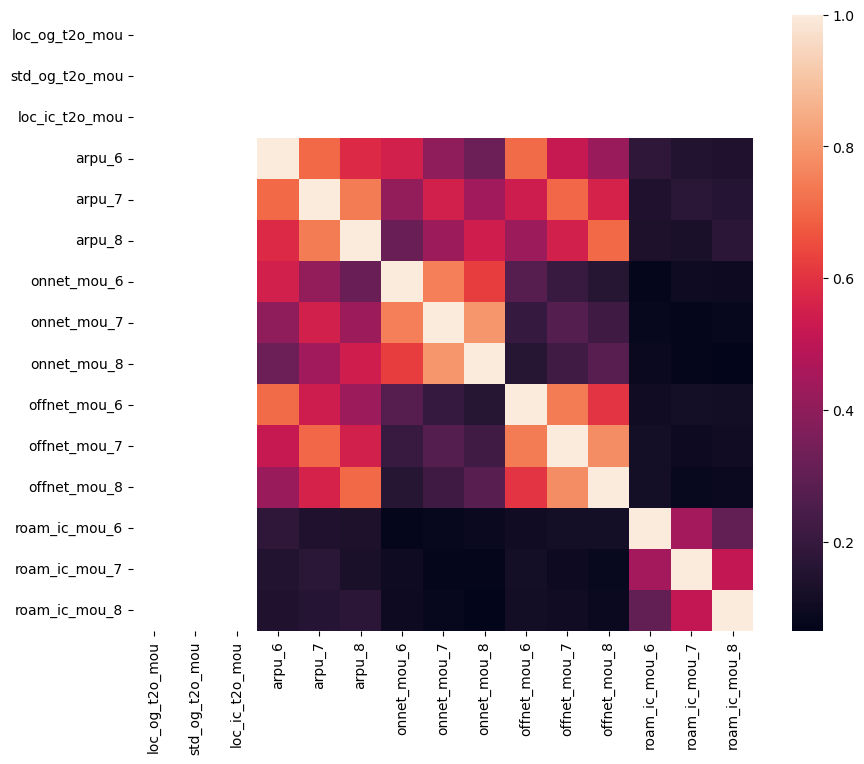

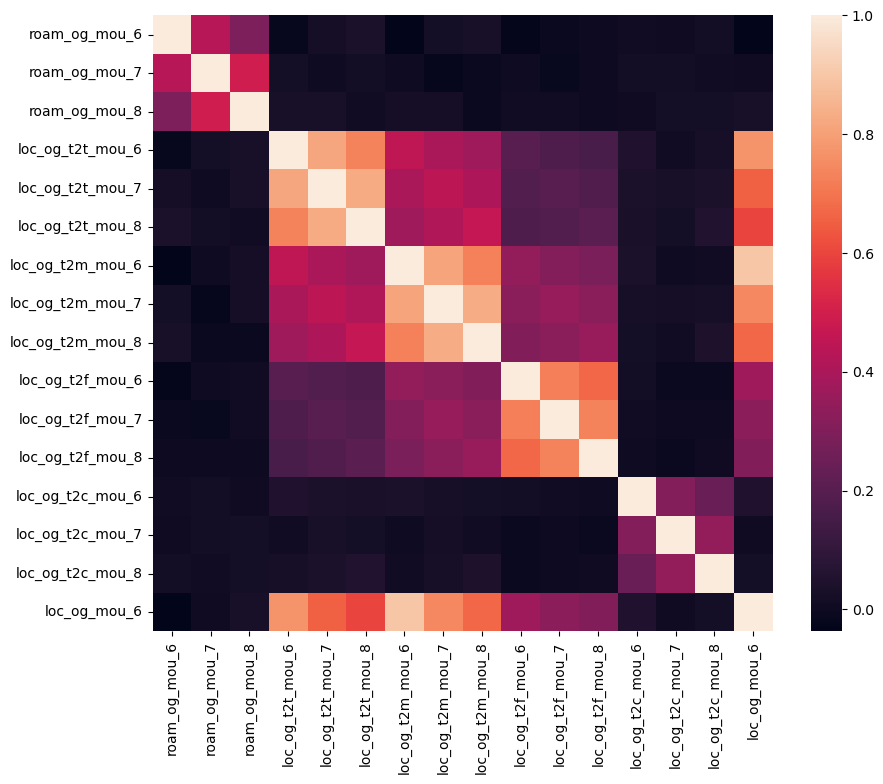

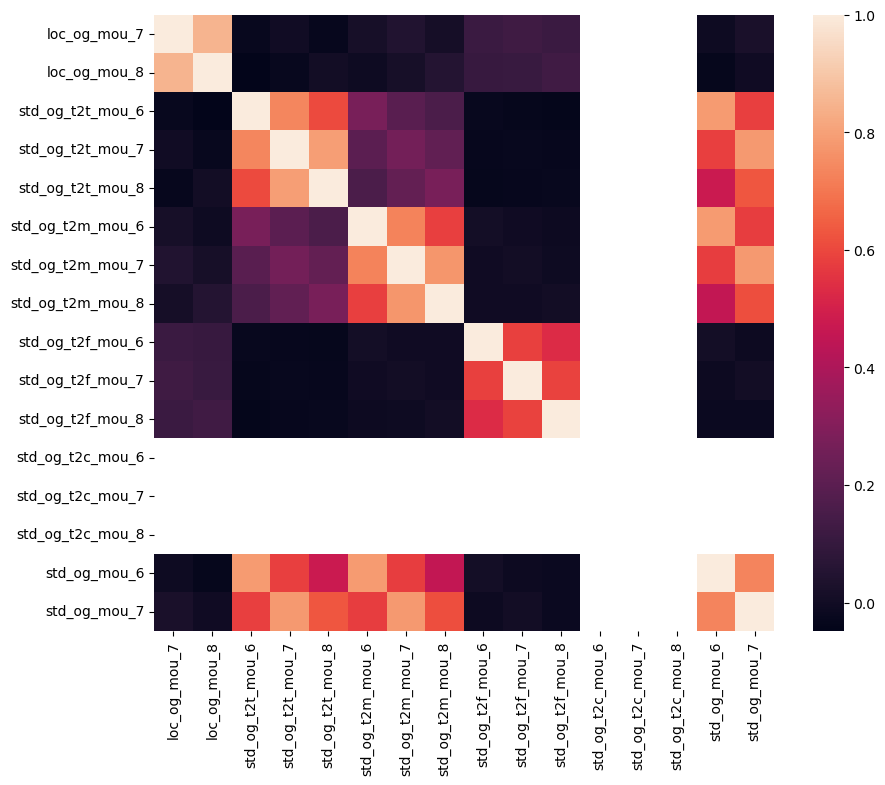

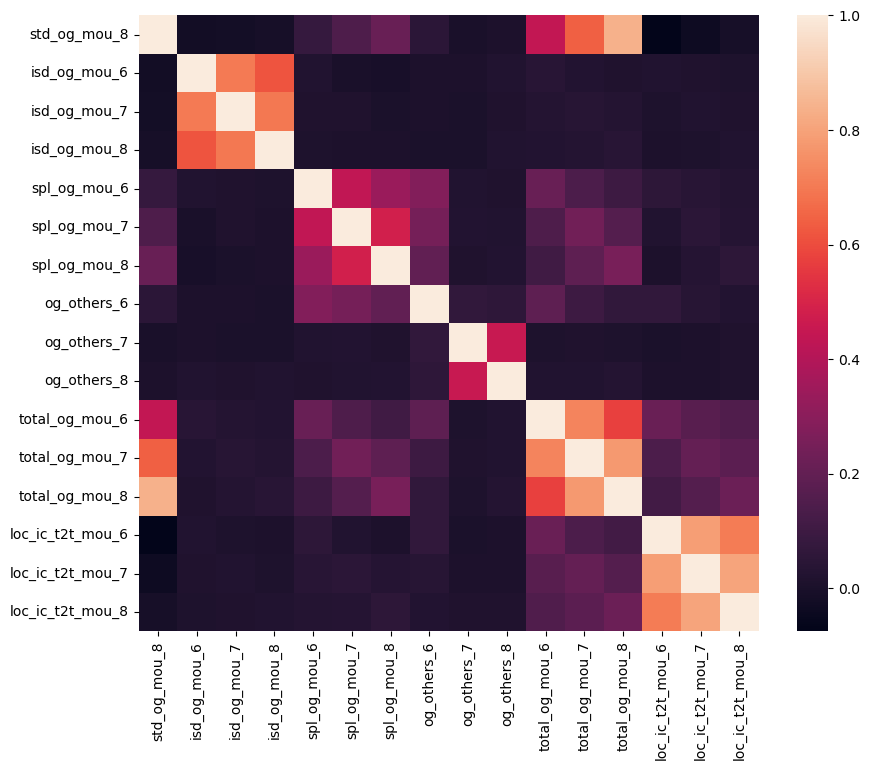

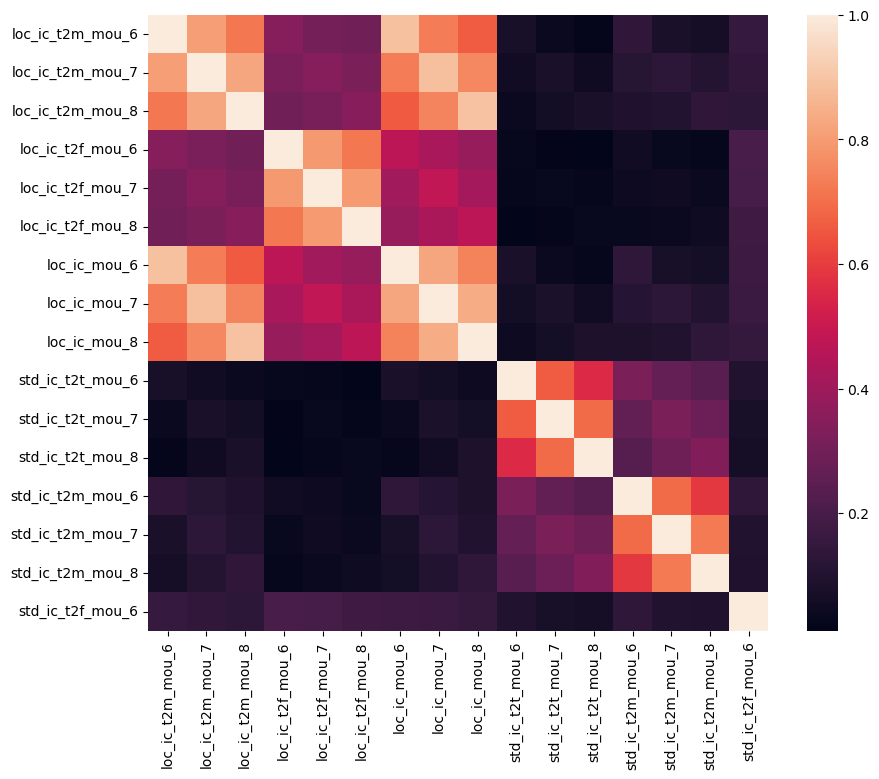

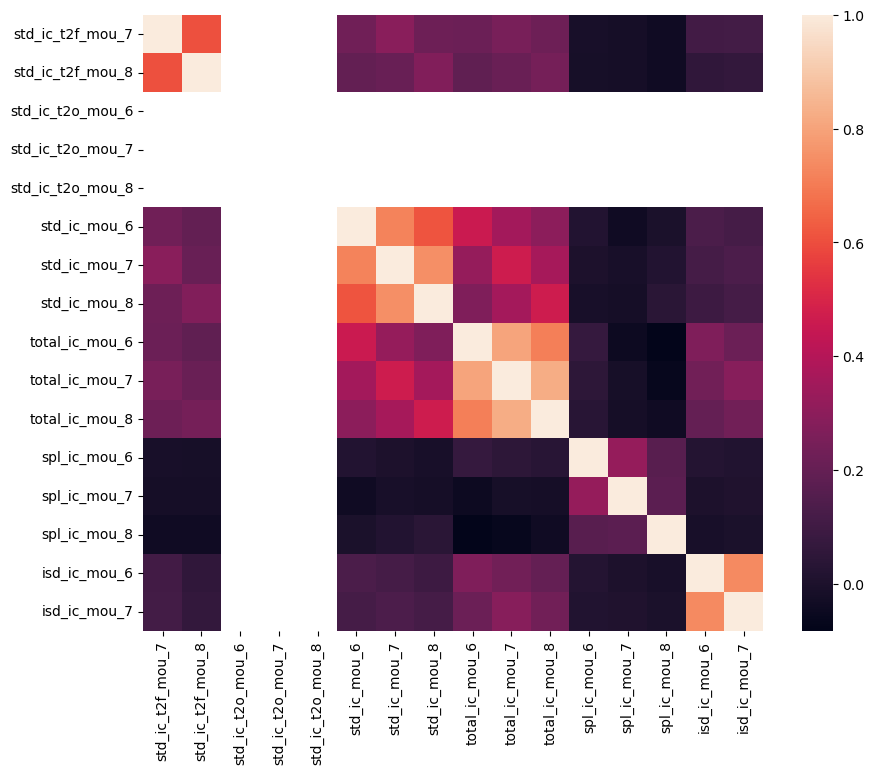

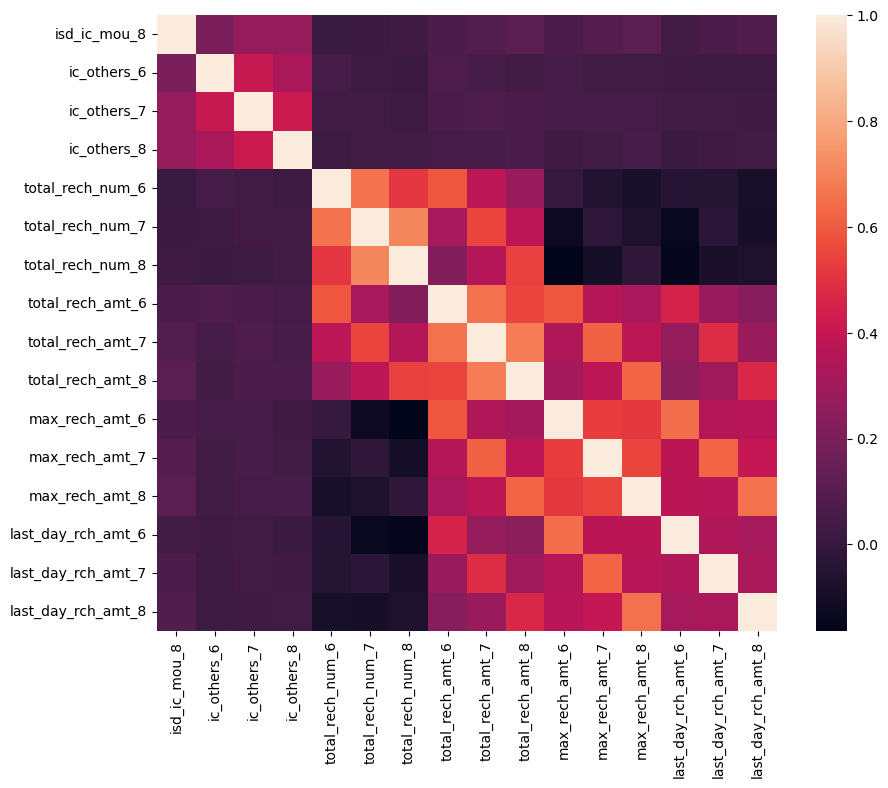

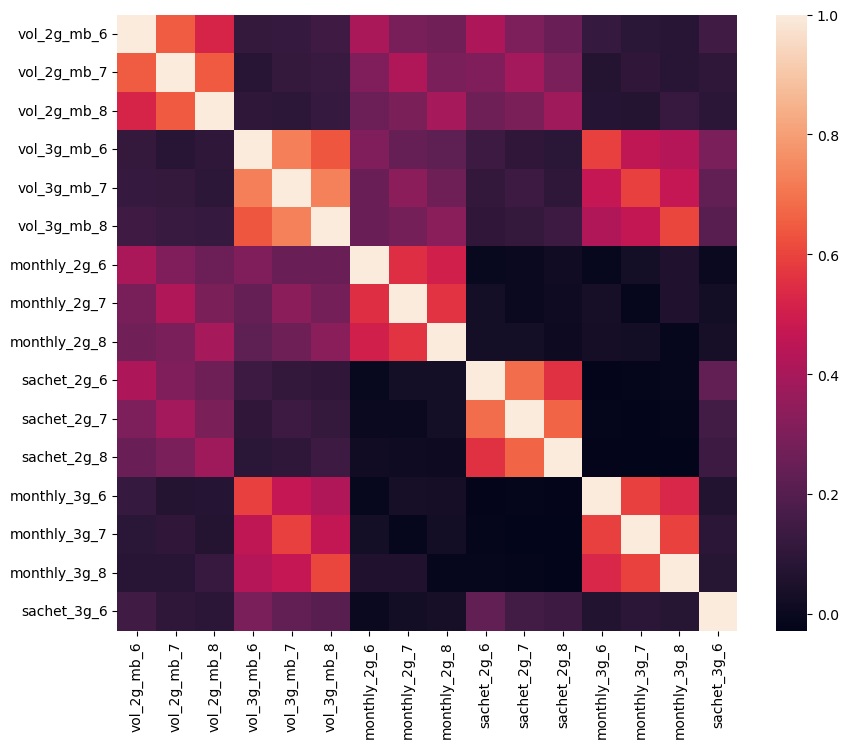

In [24]:
prev=0
for i in range(15,len(X_train.columns),16):
    plt.figure(figsize=(10,8))
    sns.heatmap(pd.DataFrame(X_train, columns=X_train.iloc[:,prev:i].columns).corr())
    prev = i

### Feature Engineering and Variable Transformation 

##### Feature scaling

In [25]:
X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
35288             0.0             0.0             0.0   78.198   29.155   
16702             0.0             0.0             0.0  118.977  164.225   
668               0.0             0.0             0.0  107.986  237.370   
63090             0.0             0.0             0.0  173.406   55.233   
67993             0.0             0.0             0.0  172.720  249.283   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
35288   32.700         9.34        13.29         2.99         77.43   
16702  146.595        44.54        43.48        36.91         64.79   
668    202.346       237.76       415.09       396.71          2.48   
63090  161.797         2.08         0.33         8.01         55.09   
67993   82.767         0.00         0.00         0.00          0.68   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
35288         13.29         28.59            0.0            0.0   
16702        101.14         95.01            0.0            0.0   
668           43.61         10.78            0.0            0.0   
63090         36.79         46.29            0.0            0.0   
67993          0.00          0.00            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
35288            0.0           0.00            0.0            0.0   
16702            0.0           0.00            0.0            0.0   
668              0.0           1.55            0.0            0.0   
63090            0.0           0.00            0.0            0.0   
67993            0.0           0.68            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
35288              9.34             13.29              2.99             48.18   
16702             44.54             43.48             36.91             58.34   
668                5.83              6.03              3.01              1.36   
63090              2.08              0.33              8.01             50.29   
67993              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
35288             13.29             27.71             28.45              0.00   
16702             96.01             88.88              5.26              3.39   
668               36.51             10.06              0.00              7.09   
63090             36.79             46.01              3.91              0.00   
67993              0.00              0.00              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
35288              0.88              0.00               0.0              0.00   
16702              1.06              0.00               0.0              1.53   
668                0.71              1.11               0.0              0.00   
63090              0.00              0.00               0.0              0.28   
67993              0.00              0.00               0.0              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
35288         85.98         26.59         31.59              0.00   
16702        108.16        142.89        126.86              0.00   
668            7.19         49.64         13.79            230.38   
63090         56.29         37.13         54.03              0.00   
67993          0.00          0.00          0.00              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
35288              0.00              0.00               0.8               0.0   
16702              0.00              0.00               0.0               0.0   
668              409.06            393.69               0.0               0.0   
63090              0.00              0.00               0.0               0.0   
67993              0.00       

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Applying PCA on data

In [27]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [28]:
pca.components_

array([[-3.50905916e-19,  2.22044605e-16, -1.11022302e-16, ...,
         4.64804505e-02,  4.65628391e-02,  4.36279464e-02],
       [-6.29121754e-20,  0.00000000e+00,  1.81278603e-16, ...,
        -5.81862197e-02, -5.86929044e-02, -5.87121724e-02],
       [-1.33950550e-19, -1.52655666e-16,  2.77555756e-16, ...,
         2.56799461e-01,  2.63965264e-01,  2.50674131e-01],
       ...,
       [-0.00000000e+00, -2.08711474e-03, -5.96961277e-03, ...,
         1.08657386e-17,  6.59194921e-17, -2.15905310e-16],
       [-0.00000000e+00,  7.31908841e-03,  1.59918636e-02, ...,
         6.55942314e-17, -8.18572640e-17, -3.24583025e-17],
       [ 9.99999421e-01, -9.78253505e-04,  4.48392965e-04, ...,
        -1.49077799e-19, -1.49077799e-19,  1.76182853e-19]])

In [29]:
pca.explained_variance_ratio_

array([1.61222028e-01, 8.73657180e-02, 5.54922332e-02, 4.69799020e-02,
       3.74552722e-02, 2.99124193e-02, 2.80643225e-02, 2.60144427e-02,
       2.50487577e-02, 2.37511742e-02, 2.13248283e-02, 2.12478623e-02,
       1.88215814e-02, 1.77687689e-02, 1.66468183e-02, 1.51332180e-02,
       1.36147091e-02, 1.27007836e-02, 1.23617652e-02, 1.18999317e-02,
       1.18886970e-02, 1.13325654e-02, 1.10633905e-02, 1.03499719e-02,
       9.42775428e-03, 9.23046235e-03, 8.99874322e-03, 8.65125650e-03,
       7.78282081e-03, 7.53463819e-03, 7.40895891e-03, 7.02081004e-03,
       6.88349922e-03, 6.80216303e-03, 6.56122981e-03, 6.26555926e-03,
       6.03548173e-03, 5.92762909e-03, 5.78075321e-03, 5.61859398e-03,
       5.41924446e-03, 5.21435043e-03, 5.10708656e-03, 5.00951730e-03,
       4.63349764e-03, 4.56429045e-03, 4.47981058e-03, 4.45388352e-03,
       4.40213392e-03, 4.37008971e-03, 4.10758410e-03, 4.00758109e-03,
       3.85089312e-03, 3.78365253e-03, 3.72652166e-03, 3.47964620e-03,
      

In [30]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

##### Making a scree plot to know how many variables explain the maximum variance

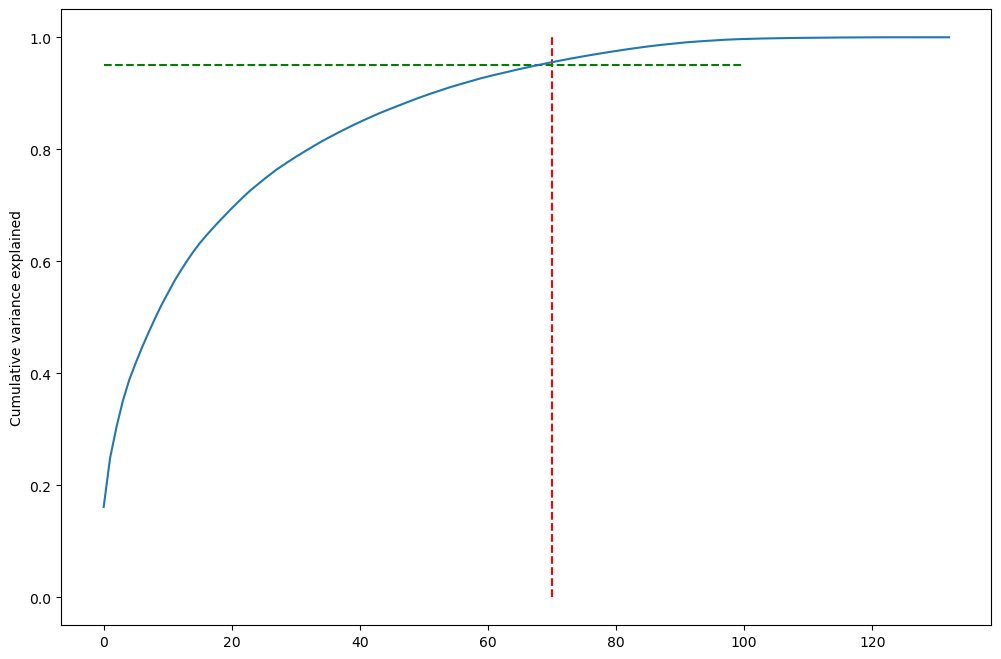

In [31]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

##### As we can see clearly, around 95% of the variance is explained by using 70 features. Hence we will be using 70 variabels to build PCA model

### Model Selection, Model Building, and  Prediction 

In [32]:
pc2 = IncrementalPCA(n_components=70)
transformed_data = pc2.fit_transform(X_train)

In [33]:
transformed_data.shape

(48999, 70)

In [34]:
df_train_pca = pd.DataFrame(transformed_data)
df_train_pca.head()

0         1         2         3         4         5         6   \
0 -4.598310 -0.446762 -0.604179 -0.454160 -1.281152 -0.136250  0.308643   
1 -1.920488 -1.871647 -1.703079 -0.488129 -0.101218 -0.262370 -0.729633   
2 -2.025708  2.882382 -0.221582 -0.994127 -1.669138  2.478043 -1.618653   
3 -3.474785 -0.179481 -0.136811 -1.104637  3.131635 -1.275482  0.678418   
4 -4.033229 -0.576378  3.386891 -0.685543  0.598901  0.028672 -0.030250   

         7         8         9         10        11        12        13  \
0 -0.538922  0.034768 -0.267377 -0.011430 -0.592967 -0.280780  0.340374   
1 -0.669054  0.347545 -0.235804 -0.657713  1.004098 -0.330967  0.191924   
2 -0.692620  0.717598 -0.801803  0.420546  0.360808 -0.704105  0.384020   
3  0.556143  1.080021 -1.045650  0.485487 -0.448530 -1.789467  0.203933   
4  0.125929  0.249085 -0.815395  1.765238 -0.487634 -0.083654 -0.172633   

         14        15        16        17        18        19        20  \
0 -0.413070  0.683514 -0.413863  0.258674  0.010601 -0.090151 -0.419357   
1 -0.786926  0.401245 -2.072786  1.424017 -1.134079  2.069873 -0.231125   
2 -0.388386 -0.253815  0.790265  0.233497  0.484420 -0.458028  0.397694   
3 -0.584702  0.137899  0.019245 -0.454781 -1.893621 -0.376942 -0.378164   
4  0.063281  0.373077  0.378715  0.383965  1.639971  0.375953  0.530377   

         21        22        23        24        25        26        27  \
0 -0.827541  0.366266  0.037693  0.103539 -0.243736 -1.087160 -0.261953   
1  3.172033 -0.453009 -0.533196 -1.991919  0.756331  0.682205  0.212510   
2 -0.293674 -0.419012 -0.811337  0.214560  0.031467 -0.618866  0.637703   
3  0.189900  0.336108 -0.161711  0.158590  0.503904 -0.148047  0.447423   
4 -0.223576 -0.199871  0.150078  0.158652  0.265951 -0.089818  0.061512   

         28        29        30        31        32        33        34  \
0 -0.900762  0.234570  0.199093  0.188290 -0.015173  0.245358 -0.930689   
1  0.618128 -0.488309 -0.826350 -0.701682  0.648506 -2.724738 -0.024337   
2  0.418562  0.025625 -0.028972 -0.661921  0.301413 -0.120380  0.500450   
3  0.676251 -0.472663  0.690170  0.149014 -0.272778  0.187467 -0.041329   
4  0.473502  0.442743  0.041241  0.176588  0.243362 -0.120352 -0.259079   

         35        36        37        38        39        40        41  \
0 -0.470520  0.222568 -0.237666 -0.014654  0.481750 -0.049613 -0.026184   
1 -0.435497 -0.107019 -0.083422  0.312504  0.313466 -0.176007 -0.333291   
2  0.547067  0.395150  0.330669 -0.242254 -0.205297 -0.015228 -0.003508   
3  0.722484 -0.185941  0.199778 -0.134808  0.107501  0.587798 -1.225342   
4  0.296116  0.366747  0.118310  0.087482 -0.347869 -0.012541  0.373013   

         42        43        44        45        46        47        48  \
0 -0.105939 -0.078949  0.220439 -0.176492 -0.063067  0.044163 -0.081825   
1 -0.233156 -0.094451  0.195373  0.066637  0.009131  0.086508  0.078092   
2 -0.115732  0.102418 -0.485225 -0.325150  0.165608  0.393577 -0.304537   
3  0.356521 -0.708207 -0.251844 -0.574445 -0.995749  0.281582 -0.466399   
4 -0.312521 -0.198631  0.337607  1.068939  2.191434 -1.214050  0.390476   

         49        50        51        52        53        54        55  \
0 -0.027708  0.220853 -0.165641 -0.105442  0.045205 -0.212600  0.104342   
1  0.169312 -0.499817 -0.035076 -0.084321  0.084831  0.022076 -0.081409   
2 -0.167450 -0.127661 -0.133408 -0.113923  0.136069 -0.184715  0.015980   
3 -0.703370 -0.001572 -0.142490  0.050292 -0.865360 -0.099806 -0.083672   
4  0.703690  0.198081  1.375409  0.483418  0.423315 -0.328463 -0.051284   

         56        57        58        59        60        61        62  \
0  0.077604  0.201267 -0.256845  0.458527  0.629366  0.681145  0.481251   
1  0.140468 -0.589774 -0.410867  0.636860 -0.168813  0.143009 -0.043025   
2  0.318756 -0.234360 -0.150205  0.232728  0.392319 -0.369718 -0.161520   
3 -0.012420 -0.115399  0.020827  0.044915 -0.160089 -0.103614  0.089850   
4  0.031691 -0.025140  0.2

In [35]:
corrmat = np.corrcoef(df_train_pca.transpose())

<Axes: >

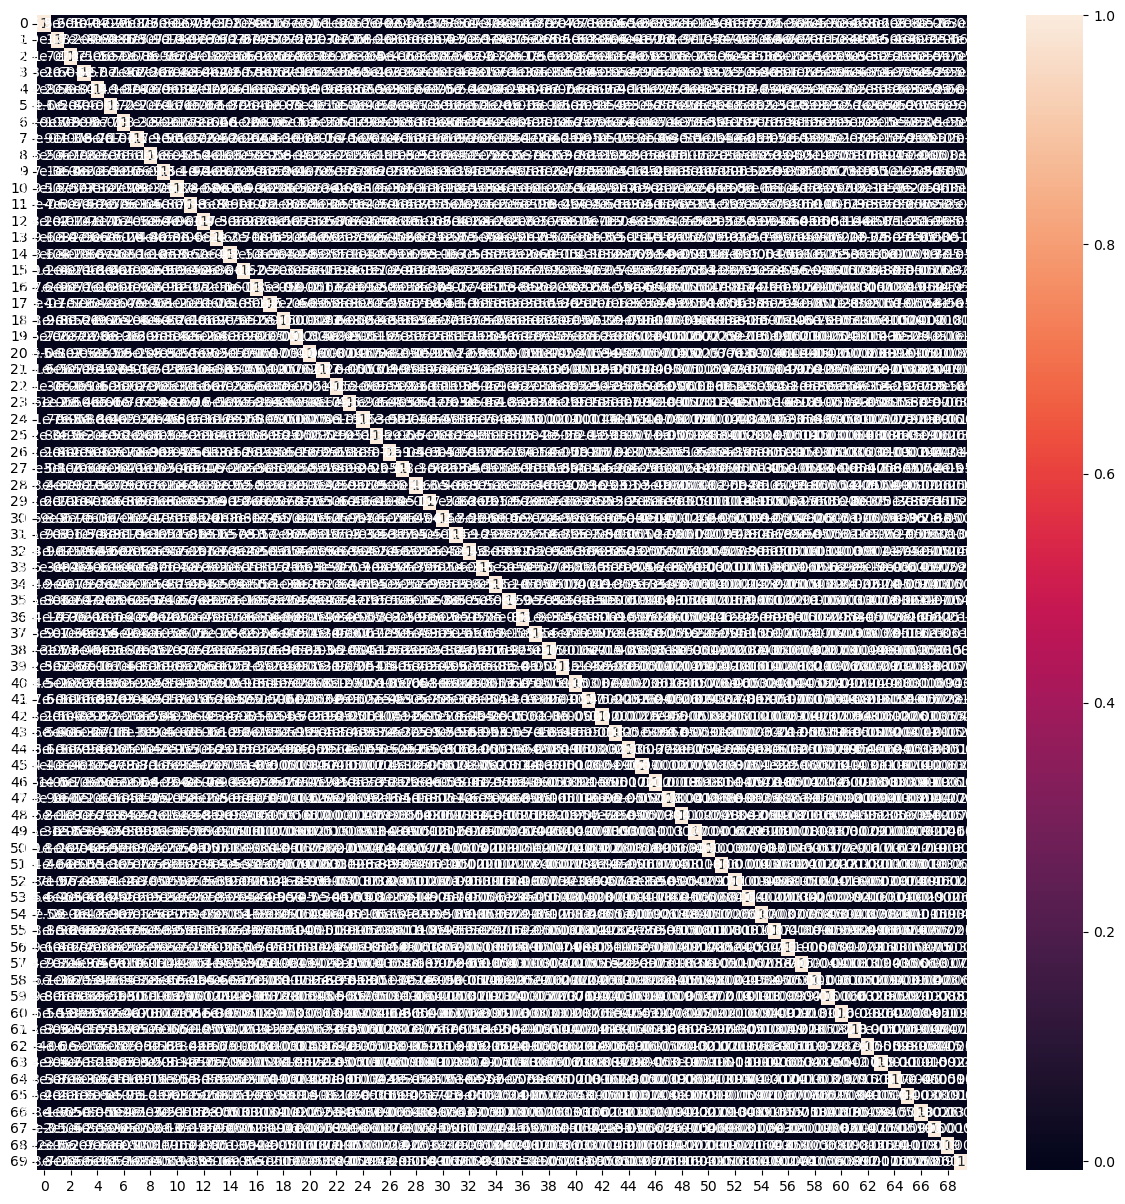

In [36]:
# Let's plot the heatmap of the coefficients obtained from pca model. 
# After the dimentionality reduction, the newly obtain coefficients should not be correlated to each other
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

##### As we can see, the newly obtained 70 coefficients are not correlated to each other

##### Let's build logistic regression model on top of transformed data received from PCA and predict the churn probability

In [37]:
logisticRegression = LogisticRegression()

In [38]:
lrmodel = logisticRegression.fit(df_train_pca, y_train)

In [39]:
# Applying transformation on test data set to reduce dimentionality and get more uncorrelated features
df_test_pca = pc2.transform(X_test)
df_test_pca.shape

(21000, 70)

In [ ]:
y_train_pred = lrmodel.predict(df_train_pca)
pred_probs_train = lrmodel.predict_proba(df_train_pca)

In [ ]:
y_test_pred = lrmodel.predict(df_test_pca)
pred_probs_test = lrmodel.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

##### Let's make a confusion matrix to analyze how each class is being predicted by the model.

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
confusion_matrix(y_test, y_test_pred)

In [ ]:
precision_score(y_test, y_test_pred)

In [ ]:
recall_score(y_test, y_test_pred)

### Creating submission file

In [ ]:
# Reading the test.csv file
unseen_data = pd.read_csv("test.csv")
unseen_data.head()

In [ ]:
unseen_data = unseen_data.set_index('id')
unseen_data.head()

In [ ]:
unseen_data = unseen_data[data_new.columns]

In [ ]:
(100*unseen_data.isnull().sum()/len(unseen_data)).describe()
# Test file has got some null values, let's fill it with 0 and predict the churn probability
unseen_data = unseen_data.fillna(0)

In [ ]:
(100*unseen_data.isnull().sum()/len(unseen_data)).describe()

In [ ]:
unseen_data_pca = pc2.transform(unseen_data)
y_test_pred_unseen = lrmodel.predict(unseen_data_pca)

In [ ]:
unseen_data['churn_probability'] = y_test_pred_unseen

In [ ]:
output = unseen_data[["churn_probability"]]
output.head()

In [ ]:
output.to_csv('submission.csv',index=True)